<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/books/zero_to_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import platform

import pandas as pd
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import OrderedDict

In [2]:
# enable Data table display for Pandas dataframes
%load_ext google.colab.data_table
# settings
plt.rcParams["figure.figsize"] = [20,15]

In [3]:
def generate_header(author='unknown', title='unknown', description ='unknown', prepared_for='unknown', tags=''):
    """
    desc: generates standard header with meta information describing report
    input: author, title, description, prepared_for, tags
    output: rendering formatted dataframe with report details
    """
    meta_dict = OrderedDict()

    # properties to fill
    meta_dict['author'] = author
    meta_dict['title'] = title
    meta_dict['description'] = description
    meta_dict['prepared_for'] = prepared_for
    meta_dict['tags'] = str(tags)

    # auto generated
    runtime = datetime.datetime
    meta_dict['runtime'] = runtime.now().strftime("%Y-%m-%d %H:%M:%S")
    path = os.getcwd()
    meta_dict['path'] = path
    python_version = platform.python_version()
    meta_dict['python_version'] = python_version
    meta_dict['pandas_version'] = pd.__version__

    df_meta= pd.DataFrame(meta_dict, index=['meta_information']).T
    return df_meta

In [4]:
# setting up header info
author = 'Michal Szczecinski'
prepared_for =''
title = 'Notebooks: Zero to One (book notes)'
description = 'Interactive notes after reading Zero to One.'
tags = ['startup', 'checklist', 'book']
generate_header(author=author, title=title, description=description, prepared_for=prepared_for, tags=tags)

,meta_information
author,Michal Szczecinski
title,Notebooks: Zero to One (book notes)
description,Interactive notes after reading Zero to One.
prepared_for,
tags,"['startup', 'checklist', 'book']"
runtime,2021-09-18 11:21:14
path,/content
python_version,3.7.12
pandas_version,1.1.5


### Header

#### Title:


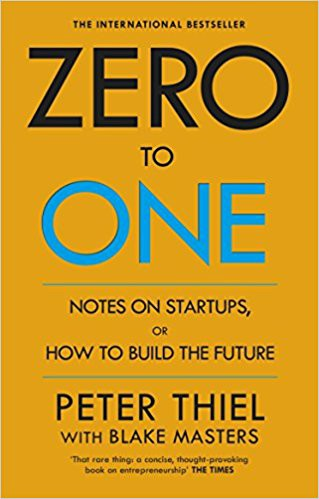

### Questions

1. What important truth do very few people agree with you on?
2. What valuable company is nobody building?

### Indicators of succesfull start up

1. The Engineering Question: Can you create breakthrough technology instead of incremental improvements?
2. The Timing Question: Is it the right time to start now?
3. Monopolies: Are you starting with a big share of a small market?
4. Team: Do you have the right team?
5. Sales: Do you have a way to deliver the product?
6. Future: Will your market be defensible 10 –20 years in the future?
7. Secret: Have you identified a unique opportunity?

In [21]:
#@title Seven questions that every business must answer
#@markdown ---
#@markdown ### 1. The Engineering Question: Can you create breakthrough technology instead of incremental improvements?
answer1= 'yes' #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 2. The Timing Question: Is now the right time to start your particular business?
answer2= 'yes' #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 3. The Monopoly Question: Are you starting with a big share of a small market?
answer3= "don't know" #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 4. The People Question: Do you have the right team?
answer4= 'yes' #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 5. The Distribution Question: Do you have a way to deliver the product?
answer5= 'yes' #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 6. The Durability Question: Will your market position be defensible 10 and 20 years into the future?
answer6= "yes" #@param  ["yes", "no", "don't know"] {allow-input: true}
#@markdown ### 7. The Secret Question: Have you identified a unique opportunity that others don't see?
answer7= "yes" #@param  ["yes", "no", "don't know"] {allow-input: true}

### Summarizing answers

In [22]:
q1 = 'Can you create breakthrough technology instead of incremental improvements?'
q2 = 'Is now the right time to start your particular business?'
q3 = 'Are you starting with a big share of a small market?'
q4 = 'Do you have the right team?'
q5 = 'Do you have a way to deliver the product?'
q6 = 'Will your market position be defensible 10 and 20 years into the future?'
q7 = "Have you identified a unique opportunity that others don't see?"

questions = [q1,q2,q3,q4,q5,q6,q7]
answers = [answer1, answer2, answer3, answer4, answer5, answer6, answer7]

df_summary = pd.DataFrame(data = {'questions':questions, 'answers': answers})
mapping = {'yes':1, 'no': -1, "don't know":0}
df_summary['points'] = df_summary['answers'].map(mapping)
df_summary

,questions,answers,points
0,Can you create breakthrough technology instead...,yes,1
1,Is now the right time to start your particular...,yes,1
2,Are you starting with a big share of a small m...,don't know,0
3,Do you have the right team?,yes,1
4,Do you have a way to deliver the product?,yes,1
5,Will your market position be defensible 10 and...,yes,1
6,Have you identified a unique opportunity that ...,yes,1


In [23]:
print ('Summary:')
df_summary['points'].sum()

Summary:


6

### Plotting technology stocks

In [24]:
stock = ['NDAQ','GOOGL','AMAZ']
years = 5
start_date = (datetime.datetime.now() - datetime.timedelta(days=years*365)).strftime("%m-%d-%Y")

In [25]:
df = web.DataReader(stock, data_source='stooq', start=start_date)
df

Attributes    Close               High  ...      Open     Volume           
Symbols        NDAQ    GOOGL      NDAQ  ...     GOOGL       NDAQ      GOOGL
2016-09-19   63.886   795.39   64.2610  ...   801.110   580975.0   808885.0
2016-09-20   63.709   799.78   64.4710  ...   800.000   547285.0   655585.0
2016-09-21   64.673   804.56   64.7190  ...   801.260   356350.0  1213343.0
2016-09-22   64.462   815.95   64.9850  ...   810.000   427737.0  1630082.0
2016-09-23   63.567   814.96   64.5730  ...   815.140   867533.0  1131451.0
...             ...      ...       ...  ...       ...        ...        ...
2021-09-13  194.320  2846.65  197.9965  ...  2838.990   547525.0  1104692.0
2021-09-14  195.550  2850.89  196.5700  ...  2859.905   464679.0   983693.0
2021-09-15  195.840  2888.59  197.1400  ...  2855.430   468199.0  1370379.0
2021-09-16  195.430  2872.20  196.4600  ...  2879.010   409867.0  1309771.0
2021-09-17  192.900  2816.00  194.9100  ...  2860.610  1263426.0  2669223.0

[1259 rows x 10 columns]

In [26]:
df2 = pd.DataFrame(df['Close'])
df2

Symbols,NDAQ,GOOGL
2016-09-19,63.886,795.39
2016-09-20,63.709,799.78
2016-09-21,64.673,804.56
2016-09-22,64.462,815.95
2016-09-23,63.567,814.96
...,...,...
2021-09-13,194.320,2846.65
2021-09-14,195.550,2850.89
2021-09-15,195.840,2888.59
2021-09-16,195.430,2872.20


In [27]:
# pip install plotly --upgrade

In [28]:
fig = px.line(df2, x=df2.index, y=['NDAQ', 'GOOGL'])
fig.show()